# Задача 3.1
Изучить поведение FDR для эксперимента из лекции (лекция 4, слайд 11, модельный эксперимент). Рассмотреть случаи, когда количество объектов m варьируется от 200 от 100000 для следующих поправок:

*   Без поправок
*   Метод Холма
*   Метод Бенджамини-Хохберга

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas
# критерий стюдента для независимых выборок
from  statsmodels.stats.weightstats import ttest_ind

# пакет для работы с множественным тестированием
from statsmodels.stats.multitest import multipletests

# пакет для проверки множественных гипотез
from statsmodels.stats.multitest import multipletests

np.random.seed(42)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Модельный эксперимент из лекции:
p = []

n = 20
m = 200
m0 = int(0.75*m)

for i in range(1,m+1):
  if i<m0:
    x = np.random.normal(size=n)
    y = st.ttest_1samp(x,0.)[1]
    p.append(y)

  else:
    x = np.random.normal(size=n,loc=1.)
    y = st.ttest_1samp(x,0.)[1]
    p.append(y)

p = np.array(p)

In [ ]:
V = 0
R = 0
for i in range(m0):
  if p[i] <0.05:
    V+=1
R+=V
for i in range(m0,m):
  if p[i] <0.05:
    R+=1

FDR = V/R

rejections1 = multipletests(p, method='holm')[0]
rejections2 = multipletests(p, method='fdr_bh')[0]

print('Посчитанный FDR для эксперимента из лекции:')
print('Без поправок:',FDR)
print('FDR для метода Холма:',rejections1[:m0].sum()/rejections1.sum())
print('FDR для метода Бенджамини-Хохберга:', rejections2[:m0].sum()/rejections2.sum())

Посчитанный FDR для эксперимента из лекции:
Без поправок: 0.1935483870967742
FDR для метода Холма: 0.043478260869565216
FDR для метода Бенджамини-Хохберга: 0.06521739130434782


In [ ]:
# Возьмем шаг изменения кол-ва объектов равным 500 (n = 20, m0 = 0.75*m)
# Значения FDR для каждого метода поместим в массивы
from tqdm import tqdm
FDR = []
FDR_H = []
FDR_BH = []

for i in tqdm(range(200,100001,500)):
  m0 = int(0.75*i)

  p = [st.ttest_1samp(np.random.normal(size=n,loc=float(j>=m0)),0.)[1] for j in range(i)]

  FDR.append( sum([j<0.05 for j in p[:m0]])/sum([j<0.05 for j in p]) )

  rejections1 = multipletests(p, method='holm')[0]
  FDR_H.append(rejections1[:m0].sum()/rejections1.sum())
  rejections2 = multipletests(p, method='fdr_bh')[0]
  FDR_BH.append(rejections2[:m0].sum()/rejections2.sum())

  

100%|██████████| 200/200 [34:23<00:00, 10.32s/it]


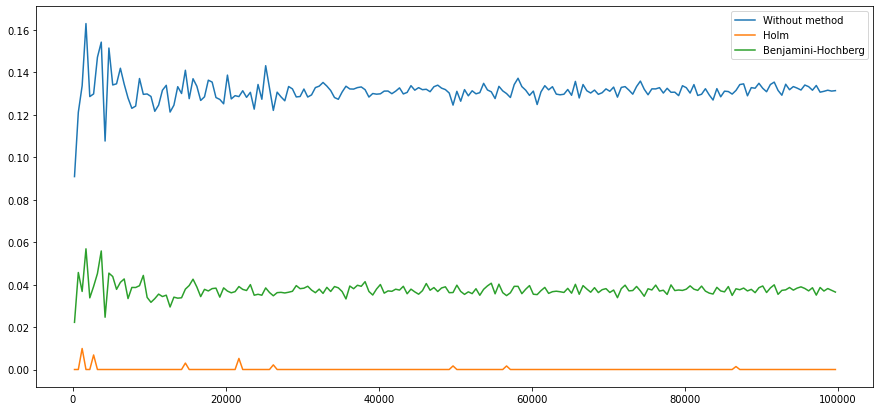

In [ ]:
nn = range(200,100001,500)
plt.rcParams["figure.figsize"] = (15, 7)
plt.plot(nn,FDR,label = 'Without method')
plt.plot(nn,FDR_H,label='Holm')
plt.plot(nn,FDR_BH,label='Benjamini-Hochberg')
plt.legend(loc ='best')


plt.show()

FDR измеряет долю ложных отклонений нулевой гипотезы относительно общего числа отклонений. При использовании метода Холма ошибка первого рода может упасть до нуля, а значит тоже самое произойдет и с FDR.

В отличии от него, метод Бенджамина-Хохберга показывает лучшие результаты в тех случаях, когда нужно принять альтернативу и отвергнуть нулевую гипотезу, но FDR не позволяет это зафиксировать.
